In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## 0. Business understanding
If you were to buy a property in Barcelona and rent it out as an Airbnb apartment, the following 3 business questions
can be of interest
1. What are the top 15 amenities in terms of frequency (=amenities I should consider offering)
2. What are the top ten locations in terms of popularity?
3. What factors are related to the renting price?

## 1. Data Understanding

In [118]:
# reading in the Barcelona Airbnb listings_df
listings_df = pd.read_csv("listings.csv.gz",compression='gzip')

In [119]:
# getting an overview of the numeric columns
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.707900e+04,1.707900e+04,1.707900e+04,17030.000000,17030.000000,17079.000000,17079.000000,17079.000000,0.0,16504.000000,...,11790.000000,11784.000000,11789.000000,11783.000000,11782.000000,17079.000000,17079.000000,17079.000000,17079.000000,11984.000000
mean,2.717895e+07,2.021071e+13,1.141008e+08,20.288432,20.288432,41.392045,2.167038,3.371509,NaN,1.662203,...,4.590252,4.749701,4.745069,4.761001,4.518300,17.973476,15.592716,2.157152,0.093565,1.012710
std,1.512193e+07,3.964960e+00,1.174252e+08,46.402286,46.402286,0.014600,0.017812,2.227039,NaN,1.004980,...,0.559118,0.464123,0.478392,0.386122,0.535292,35.705521,35.179902,8.935116,0.886143,1.200465
min,1.867400e+04,2.021071e+13,3.073000e+03,0.000000,0.000000,41.349430,2.089110,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.480228e+07,2.021071e+13,8.964998e+06,1.000000,1.000000,41.380585,2.156680,2.000000,NaN,1.000000,...,4.500000,4.710000,4.700000,4.690000,4.380000,1.000000,0.000000,0.000000,0.000000,0.150000
50%,2.852894e+07,2.021071e+13,6.134564e+07,3.000000,3.000000,41.389530,2.167960,2.000000,NaN,1.000000,...,4.750000,4.890000,4.890000,4.860000,4.630000,3.000000,1.000000,1.000000,0.000000,0.570000
75%,4.085153e+07,2.021071e+13,2.046628e+08,15.000000,15.000000,41.401830,2.177610,4.000000,NaN,2.000000,...,4.940000,5.000000,5.000000,5.000000,4.830000,15.000000,12.000000,1.000000,0.000000,1.500000
max,5.087501e+07,2.021071e+13,4.112358e+08,547.000000,547.000000,41.463060,2.228480,16.000000,NaN,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,174.000000,174.000000,90.000000,15.000000,14.570000


In [120]:
# viewing the first rows of the dataset
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20210707180233,2021-07-07,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,...,4.90,4.75,4.30,HUTB-002062,t,18,18,0,0,0.23
1,23197,https://www.airbnb.com/rooms/23197,20210707180233,2021-07-08,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,"Beautiful spacious apartment, large terrace, 5...",Strategically located in the Parc del Fòrum ar...,https://a0.muscache.com/pictures/738532/806da1...,90417,https://www.airbnb.com/users/show/90417,...,4.98,4.67,4.69,HUTB-005057,f,2,2,0,0,0.78
2,32711,https://www.airbnb.com/rooms/32711,20210707180233,2021-07-08,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,...,4.79,4.81,4.40,HUTB-001722,t,3,3,0,0,0.62
3,34241,https://www.airbnb.com/rooms/34241,20210707180233,2021-07-07,Private Double room - Plaza Real,<b>The space</b><br />It is a Private double r...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,https://www.airbnb.com/users/show/73163,...,4.60,4.20,3.40,Exempt,f,2,1,1,0,0.06
4,34981,https://www.airbnb.com/rooms/34981,20210707180233,2021-07-07,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,https://www.airbnb.com/users/show/73163,...,4.71,4.72,4.50,HUTB-001506,f,2,1,1,0,1.54


In [5]:
# checking the columns for missing values
np.sum(listings_df.isna()).sort_values(ascending=False)

bathrooms                       17079
calendar_updated                17079
neighborhood_overview            6678
neighbourhood                    6678
host_about                       6434
                                ...  
latitude                            0
neighbourhood_group_cleansed        0
neighbourhood_cleansed              0
availability_60                     0
id                                  0
Length: 74, dtype: int64

In [6]:
# checking the length of the dataset
len(listings_df)

17079

In [7]:
# viewing the names of the columns
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

## 2. Data Analysis

### 2.1: Question 1: What are the top 15 amenities by number of occurrence?

In [8]:
# get an overview of column amenities
listings_df['amenities']

0        ["Washer", "Host greets you", "Iron", "Hair dr...
1        ["Washer", "Iron", "Hair dryer", "Security cam...
2        ["Washer", "Iron", "Hair dryer", "Security cam...
3        ["Oven", "Microwave", "Kitchen", "Elevator", "...
4        ["Washer", "Extra pillows and blankets", "Iron...
                               ...                        
17074    ["Iron", "Hair dryer", "Hangers", "TV", "Wifi"...
17075    ["Washer", "Iron", "Hair dryer", "Long term st...
17076    ["Kitchen", "Wifi", "Smoke alarm", "Dedicated ...
17077    ["Washer", "Kitchen", "Hangers", "Security cam...
17078    ["Washer", "Iron", "Hair dryer", "Hangers", "K...
Name: amenities, Length: 17079, dtype: object

In [9]:
# create a dictionary of all possible amenities and the overall count
def find_possible_amenities():
    """
    This function creates a dictionary with the amenity denomination as the key and the total count as the value
    Arguments:
        None
    Returns:
        amenities - dictionary of amenities and the count of their occurrence
        
    """
    amenities_dict = {}
    for index, value in listings_df['amenities'].iteritems():
        # convert string representation of the list to a list datatype
        value = json.loads(value)
        for item in value:
            if item not in amenities_dict.keys():
                amenities_dict[item] = 1
            else:
                amenities_dict[item] = amenities_dict[item] + 1
    return amenities_dict                

In [10]:
# execute find_possible_amenities() function and receive the dictionary in the variable amenities
amenities = find_possible_amenities()

In [11]:
# check if the dictionary looks correct
print(amenities)

{'Washer': 13273, 'Host greets you': 4873, 'Iron': 12708, 'Hair dryer': 13190, 'Hangers': 13830, 'TV': 10776, 'Wifi': 16414, 'Kitchen': 14954, 'Hot water': 10861, 'Dedicated workspace': 9259, 'Elevator': 9323, 'Heating': 13071, 'Free street parking': 1250, 'Shampoo': 10116, 'Air conditioning': 10924, 'Long term stays allowed': 15135, 'Paid parking on premises': 1920, 'Crib': 3471, 'Essentials': 15511, 'Security cameras on property': 1515, 'Dishes and silverware': 9371, 'Paid parking off premises': 3947, 'Coffee maker': 8300, 'Dryer': 4578, 'High chair': 2699, 'Cooking basics': 8739, 'Patio or balcony': 5513, 'Oven': 6909, 'Bed linens': 7845, 'Microwave': 8616, 'Pack ’n Play/travel crib': 1436, 'Dishwasher': 4669, 'Smoke alarm': 4121, 'Refrigerator': 9144, 'Stove': 6371, 'Fire extinguisher': 4071, 'Luggage dropoff allowed': 3541, 'TV with standard cable': 1847, 'Smart lock': 521, 'First aid kit': 3789, 'Cable TV': 1943, 'Carbon monoxide alarm': 2780, 'Extra pillows and blankets': 4287, 

In [122]:
# sort amenities dictionary by value and get the top 15 entries
def get_top_15_amenities(amenities):
    """
    This function orders the amenities by the number of occurrence and returns a dictionary with the most frequent
    15 amenities
    Arguments:
        amenities - dictionary holding all possible amenities and their count
    Returns:
        sorted_amenities_dict - dictionary holding the top 15 amenities ordered by their count
        
    """
    sorted_amenities_tuples = sorted(amenities.items(), key=lambda item: item[1], reverse=True)[0:15]
    sorted_amenities_dict = {key: value for key, value in sorted_amenities_tuples}
    return sorted_amenities_dict

In [13]:
# execute function get_top_15_amenities and accept the sorted dict in the variable top_15_amenities
top_15_amenities = get_top_15_amenities(amenities)

In [123]:
# view the dictionary with the top 15 amenities, by frequency
print(top_15_amenities)

{'Wifi': 16414, 'Essentials': 15511, 'Long term stays allowed': 15135, 'Kitchen': 14954, 'Hangers': 13830, 'Washer': 13273, 'Hair dryer': 13190, 'Heating': 13071, 'Iron': 12708, 'Air conditioning': 10924, 'Hot water': 10861, 'TV': 10776, 'Shampoo': 10116, 'Dishes and silverware': 9371, 'Elevator': 9323}


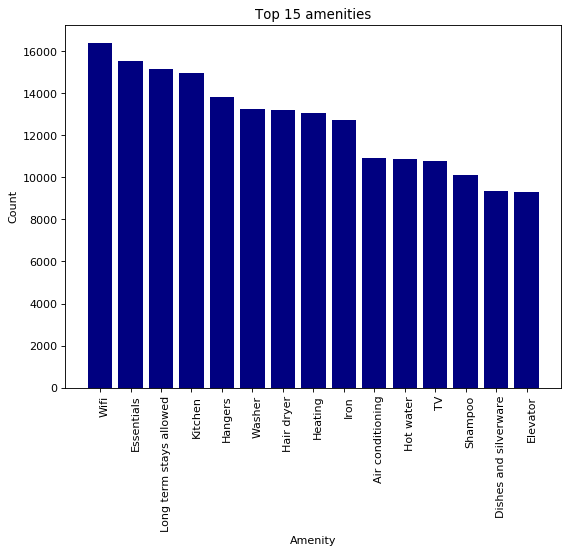

In [124]:
# plot the top 15 amenities
figure(figsize=(8, 6), dpi=80)
data = top_15_amenities
keys = list(top_15_amenities.keys())
values = list(top_15_amenities.values())
plt.bar(range(len(data)), values, tick_label=keys, color='navy')
plt.xlabel('Amenity')
plt.ylabel('Count')
plt.title('Top 15 amenities')
plt.xticks(rotation=90, ha='left')
plt.show()

### 2.2: Question 2: What are the top locations (neighbourhood and room type) in terms of popularity?

#### 2.2.1. Neighbourhoods

In [130]:
# create a subset of the dataset containg only the columns indicating the neighbourhood and the neighbourhood score
neighbourhood_df = listings_df[['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'review_scores_location']]

In [131]:
# check the shape of the neighbourhood_df
neighbourhood_df.shape

(17079, 3)

In [132]:
# check the neighbourhood_df columns
neighbourhood_df.columns

Index(['neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'review_scores_location'],
      dtype='object')

In [133]:
# drop rows from dataframe where no location review is available
neighbourhood_df = neighbourhood_df.dropna(subset=['review_scores_location'], axis=0)

In [134]:
# review the shape of the neighbourhood_df
neighbourhood_df.shape

(11783, 3)

In [135]:
# calculate the average rating for the neighbourhood groups
neighbourhood_groups_rating_df = neighbourhood_df.groupby(
                                     by= ['neighbourhood_group_cleansed']).agg(
                                     neighbourhood_rating=('review_scores_location', np.mean)).sort_values(
                                         by='neighbourhood_rating',
                                         ascending=False
                                         )

In [136]:
# view the aggregated dataframe neighbourhood_groups_rating_df
neighbourhood_groups_rating_df

,neighbourhood_rating
neighbourhood_group_cleansed,
Eixample,4.830541
Ciutat Vella,4.797813
Gràcia,4.774622
Sants-Montjuïc,4.712753
Sarrià-Sant Gervasi,4.675966
Sant Martí,4.673158
Les Corts,4.652163
Horta-Guinardó,4.536324
Sant Andreu,4.527310


In [137]:
def create_barplot(x, y, ylabel, xlabel, title, size):
    """
    This function creates a seaborn barplot based on the parameters indicated
    Arguments:
        x - data to be displayed on x-axis
        y - data to be displayed on y-axix
        ylabel - desired ylabel
        xlabel - desired xlabel
        title - desired title of the barplot
        size - tuple setting the limit of the y-axis      
    Returns:
        None     
    """
    figure(figsize=(8, 6), dpi=80)
    g=sns.barplot(x=x, y=y)
    plt.xticks(rotation=90)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    ax=g
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                    textcoords='offset points')
    _ = g.set_ylim(size)

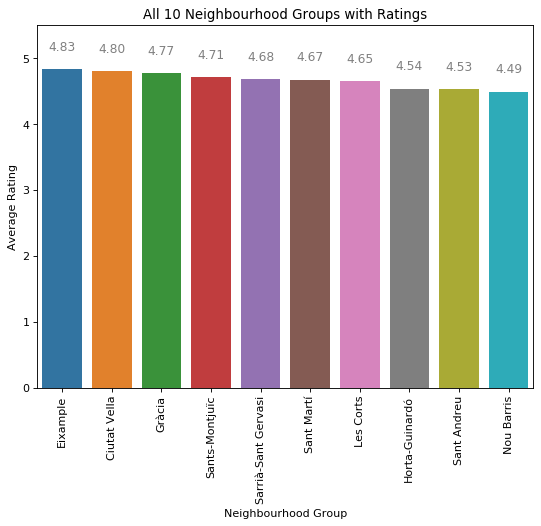

In [141]:
# execute create_barplot function on neighbourhood_groups_rating_df
create_barplot(x=neighbourhood_groups_rating_df.index, 
               y=neighbourhood_groups_rating_df.neighbourhood_rating,
               ylabel='Average Rating', 
               xlabel='Neighbourhood Group',
               title='All 10 Neighbourhood Groups with Ratings',
               size=(0, 5.5)
              )

In [142]:
# find the top 10 neighbourhoods out of the more granular column 'neighbourhood_cleansed'
# view the 'neighbourhood_cleansed' column
neighbourhood_df['neighbourhood_cleansed'].value_counts()

la Dreta de l'Eixample                   1423
el Raval                                  919
la Sagrada Família                        750
el Barri Gòtic                            724
Sant Pere, Santa Caterina i la Ribera     698
                                         ... 
la Marina del Prat Vermell                  6
Ciutat Meridiana                            3
Baró de Viver                               1
Torre Baró                                  1
Can Peguera                                 1
Name: neighbourhood_cleansed, Length: 70, dtype: int64

In [143]:
# find the top 10 neighbourhoods of neighbourhood_cleansed_column (more fine grained), in terms of average rating
neighbourhood_rating_df = neighbourhood_df.groupby(by= ['neighbourhood_cleansed']).agg(
                                                   neighbourhood_rating=('review_scores_location', np.mean)).sort_values(
                                                        by='neighbourhood_rating',
                                                        ascending=False
                                                    )[0:10]

In [144]:
# view neighbourhood_rating_df 
neighbourhood_rating_df 

,neighbourhood_rating
neighbourhood_cleansed,
Can Peguera,4.910000
la Barceloneta,4.896091
la Dreta de l'Eixample,4.885228
"Sant Pere, Santa Caterina i la Ribera",4.860100
el Barri Gòtic,4.857279
l'Antiga Esquerra de l'Eixample,4.838045
la Vila de Gràcia,4.822062
la Sagrada Família,4.818707
Sant Antoni,4.804752


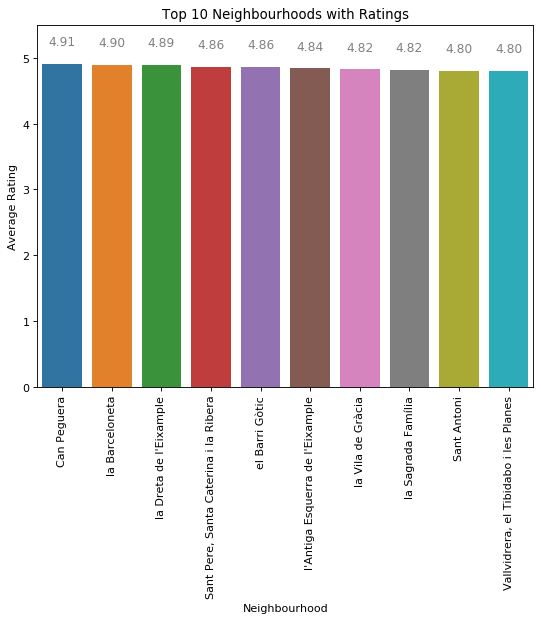

In [145]:
# execute create_barplot function on neighbourhood_rating_df
create_barplot(x=neighbourhood_rating_df.index, 
               y=neighbourhood_rating_df.neighbourhood_rating,
               ylabel='Average Rating', 
               xlabel='Neighbourhood',
               title='Top 10 Neighbourhoods with Ratings',
               size=(0, 5.5)
              )

#### 2.2.2. Room types

In [29]:
# view possible room type values
listings_df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [30]:
# create df with room type column and location scores
room_type_df = listings_df[['room_type', 'review_scores_location']].dropna(how='any')

In [147]:
# view shape of room_type_df
room_type_df.shape

(11783, 2)

In [148]:
# calculate the count for each of the roomtypes
roomtype_count_df = room_type_df.groupby(by= ['room_type']).agg(
                                                     roomtype_count=('review_scores_location', len)).sort_values(
                                                         by='roomtype_count',
                                                         ascending=False
                                                                )

In [149]:
# view roomtyp_count_df
roomtype_count_df

,roomtype_count
room_type,
Entire home/apt,6301.0
Private room,5208.0
Hotel room,177.0
Shared room,97.0


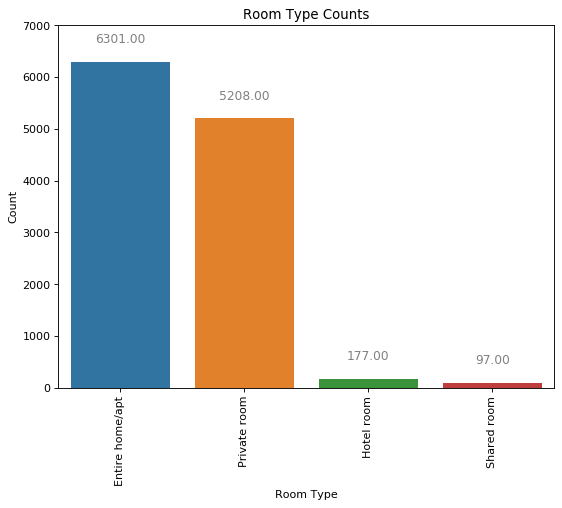

In [150]:
# execute create_barplot function on roomtype_count_df
create_barplot(x=roomtype_count_df.index, 
               y=roomtype_count_df.roomtype_count,
               ylabel='Count', 
               xlabel='Room Type',
               title='Room Type Counts',
               size=(0, 7000)
              )

In [151]:
# calculate the average rating for the roomtype
roomtype_rating_df = room_type_df.groupby(by= ['room_type']).agg(
                                                     roomtype_rating=('review_scores_location', np.mean)).sort_values(
                                                        by='roomtype_rating',
                                                        ascending=False
                                                                      )

In [152]:
# view roomtype_rating_df
roomtype_rating_df

,roomtype_rating
room_type,
Hotel room,4.827627
Entire home/apt,4.762722
Private room,4.757488
Shared room,4.716289


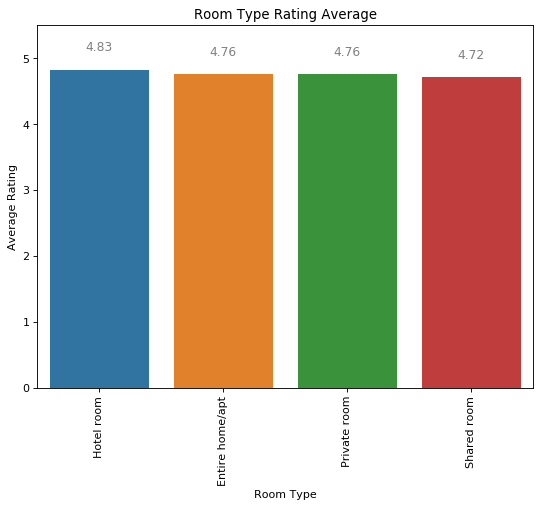

In [153]:
# execute create_barplot function on roomtype_rating_df
create_barplot(x=roomtype_rating_df.index, 
               y=roomtype_rating_df.roomtype_rating,
               ylabel='Average Rating', 
               xlabel='Room Type',
               title='Room Type Rating Average',
               size=(0, 5.5)
              )

### 2.3: Question 3: What are the factors that relate to the price?

In [161]:
# reviewing of listings_df columns
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [162]:
# generate dataframe with relevant columns for the renting price, related to the building itself
price_listings_df = listings_df[['id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed','property_type', 'room_type', 
             'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price']]

In [163]:
g# get an overview of the datatypes in the relevant columns
price_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17079 entries, 0 to 17078
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            17079 non-null  int64  
 1   neighbourhood_cleansed        17079 non-null  object 
 2   neighbourhood_group_cleansed  17079 non-null  object 
 3   property_type                 17079 non-null  object 
 4   room_type                     17079 non-null  object 
 5   accommodates                  17079 non-null  int64  
 6   bathrooms_text                17059 non-null  object 
 7   bedrooms                      16504 non-null  float64
 8   beds                          16738 non-null  float64
 9   price                         17079 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.3+ MB


In [164]:
# view values of bathrooms_text column
price_listings_df['bathrooms_text'].unique()

array(['2 baths', '1.5 baths', '1 private bath', '3 baths',
       '2 shared baths', '1 shared bath', '1 bath', '1.5 shared baths',
       '3.5 baths', '2.5 baths', '4 baths', 'Shared half-bath', nan,
       '2.5 shared baths', '7.5 baths', '5.5 baths', '4.5 baths',
       '6 baths', 'Half-bath', '0 shared baths', 'Private half-bath',
       '4.5 shared baths', '0 baths', '3.5 shared baths', '5 baths',
       '8 baths', '7 baths', '3 shared baths', '11 shared baths',
       '4 shared baths', '5 shared baths', '7 shared baths',
       '8 shared baths', '7.5 shared baths', '16 baths', '6.5 baths'],
      dtype=object)

In [165]:
# drop rows with missing values from the dataset
price_listings_df = price_listings_df.dropna(how='any')

In [166]:
# check the shape of the dataset, after removing missing values
price_listings_df.shape

(16163, 10)

In [167]:
# prepare categorical data, columns 'neighbourhood_cleansed', 'neighbourhood_group_cleansed','property_type', 'room_type',
# 'bathrooms_text'
cat_df = price_listings_df[['neighbourhood_cleansed', 
                            'neighbourhood_group_cleansed',
                            'property_type',
                            'room_type', 'bathrooms_text']].select_dtypes(include=['object'])
cat_df_dummies = pd.get_dummies(data=cat_df, dummy_na=False)

In [168]:
# prepare numerical data, columns id, bedrooms, beds, price
# no action needed for the columns id, bedrooms and beds, only the values in column price need to be converted
# into a numerical format
price_listings_df['price'].values
price_listings_df['price'].values
price_listings_df['numeric_price'] = price_listings_df['price'].apply(lambda x: int(float(x.strip('$').replace(',', ''))))
num_df = price_listings_df[['id', 'bedrooms', 'beds', 'accommodates', 'numeric_price']]

In [169]:
# unite the reshaped categorical dataset cat_df_dummies and the processed numerical dataset num_df
price_df_with_dummies = pd.concat([cat_df_dummies, num_df], axis=1, join='outer')

In [170]:
# view the united dataset price_df_with_dummies
price_df_with_dummies.head()

,neighbourhood_cleansed_Baró de Viver,neighbourhood_cleansed_Can Baró,neighbourhood_cleansed_Can Peguera,neighbourhood_cleansed_Canyelles,neighbourhood_cleansed_Ciutat Meridiana,neighbourhood_cleansed_Diagonal Mar i el Front Marítim del Poblenou,neighbourhood_cleansed_Horta,neighbourhood_cleansed_Hostafrancs,neighbourhood_cleansed_Montbau,neighbourhood_cleansed_Navas,...,bathrooms_text_8 baths,bathrooms_text_8 shared baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,id,bedrooms,beds,accommodates,numeric_price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18674,3.0,6.0,8,169
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,23197,3.0,5.0,6,240
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,32711,2.0,3.0,6,144
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,34241,1.0,1.0,2,50
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,34981,4.0,6.0,9,283


In [85]:
# define X features and y target
X = price_df_with_dummies.drop(['numeric_price'], axis=1)

In [86]:
X.shape

(16163, 182)

In [87]:
y = price_df_with_dummies['numeric_price']

In [88]:
y.shape

(16163,)

In [89]:
# create a train and test dataset for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
# instantiate linear model and fit it with the training data = data modelling
lm =  LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
# model evaluation
predictions = lm.predict(X_test)
print(r2_score(y_test, predictions))

0.07843101378093809


In [95]:
# retrain model only with num_df features
num_df.head()

,id,bedrooms,beds,accommodates,numeric_price
0,18674,3.0,6.0,8,169
1,23197,3.0,5.0,6,240
2,32711,2.0,3.0,6,144
3,34241,1.0,1.0,2,50
4,34981,4.0,6.0,9,283


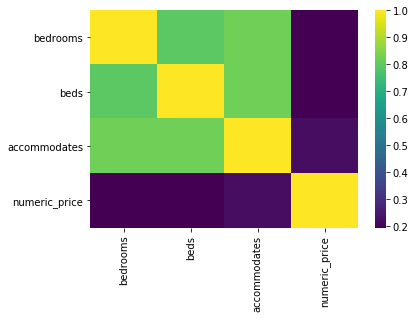

In [171]:
# view correlations in num_df
sns.heatmap(num_df.drop('id', axis=1).corr(), cmap='viridis')

In [172]:
# define X features and y target for num_df
X = num_df.drop('numeric_price', axis=1)
X.shape

(16163, 4)

In [173]:
y = num_df['numeric_price']
y.shape

(16163,)

In [174]:
# split data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [175]:
# instantiate linear regression model and fit it with the training data
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
# predict y values for X_test data
predictions = lm.predict(X_test)

In [177]:
# evaluate the model
r2_score(y_test, predictions)

0.05025284907109684